In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('/kaggle/input/dataset.csv')

In [4]:
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# 1. Расшифровка всех категорий

подробно рассмотрим каждую колонку в представленном датасете:

1. Unname0: Это обычно индексная колонка, которая демонстрирует номера стро.

2. trackid: Уникальный идентификатор для каждой дорожки (сказки) в датасете. Это может быть строка или код, который помогает однозначно идентифицировать трек.

3. artists: Название исполнителей, которые исполняют данный трек. Могут быть указаны несколько исполнителей, разделенных запятыми или другим разделителем.

4. albumname: Название альбома, в который входит данный трек. Эта информация может быть полезна для понимания контекста, в котором была создана песня.

5. trackname: Название трека. Эта информация помогает идентифицировать конкретную песню.

6. popularity: Рейтинг популярности трека, который может варьироваться от 0 до 100. Чем выше значение, тем более популярный трек.

7. durationms: Длительность трека в миллисекундах. Это структурированная информация о продолжительности песни.

8. explicit: Логическое значение (True/False), указывающее, содержит ли трек ненормативную лексику или темы для взрослых.

9. danceability: Значение от 0.0 до 1.0, показывающее, насколько трек подходит для танцев. Высокое значение означает, что песня имеет ритм и структуру, удобные для танцев.

10. energy: Значение от 0.0 до 1.0, показывающее, насколько "энергичной" является песня. Высокие значения часто связаны с треками, имеющими интенсивный звук, быстрый темп и сильные ударные.

11. key: Музыкальный ключ, в котором написан трек. Это количественное значение, которое помогает определить тональность.

12. loudness: Уровень громкости трека в децибелах (дБ). Значение может быть отрицательным; более высокие значения указывают на громкие треки.

13. mode: Указывает на модус (мажорный или минорный), в котором написан трек. Значение 0 обычно соответствует минору, а 1 — мажору.

14. speechiness: Значение от 0.0 до 1.0, показывающее, насколько трек содержит речь. Высокие значения связаны с песнями, где много говорящей речи, такие как рэп или подкасты.

15. acousticness: Значение от 0.0 до 1.0, показывающее, насколько трек "акустический". Высокие значения указывают на использование живого инструментария.

16. instrumentalness: Значение от 0.0 до 1.0, показывающее, насколько трек инструментальный. Высокие значения указывают на треки без вокала.

17. liveness: Значение от 0.0 до 1.0, показывающее, насколько трек кажется записанным "вживую". Высокие значения указывают на концерты или записи с аудиторией.

18. valence: Значение от 0.0 до 1.0, показывающее, насколько трек имеет "позитивные" или "счастливые" эмоции. Высокие значения соответствуют радостным, веселым трекам.

19. tempo: Темп трека в ударах в минуту (bpm). Это значение указывает на скорость песни.

20. timesignature: Основной размер, в котором написан трек. Например, 4 означает, что в каждом такте четыре удара.

21. trackgenre: Жанр трека, который классифицирует музыку по стилю (например, поп, рок, джаз и т.д.).лиза, классификации или рекомендации музыки.

In [6]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

Видем, что у популярности много нулевых значений

In [7]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [5]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.shape

(113999, 21)

# Графики для числовых признаков

## scatterplot по числовым признакам по отношению к популярности

/tmp/ipykernel_24/1404289448.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')


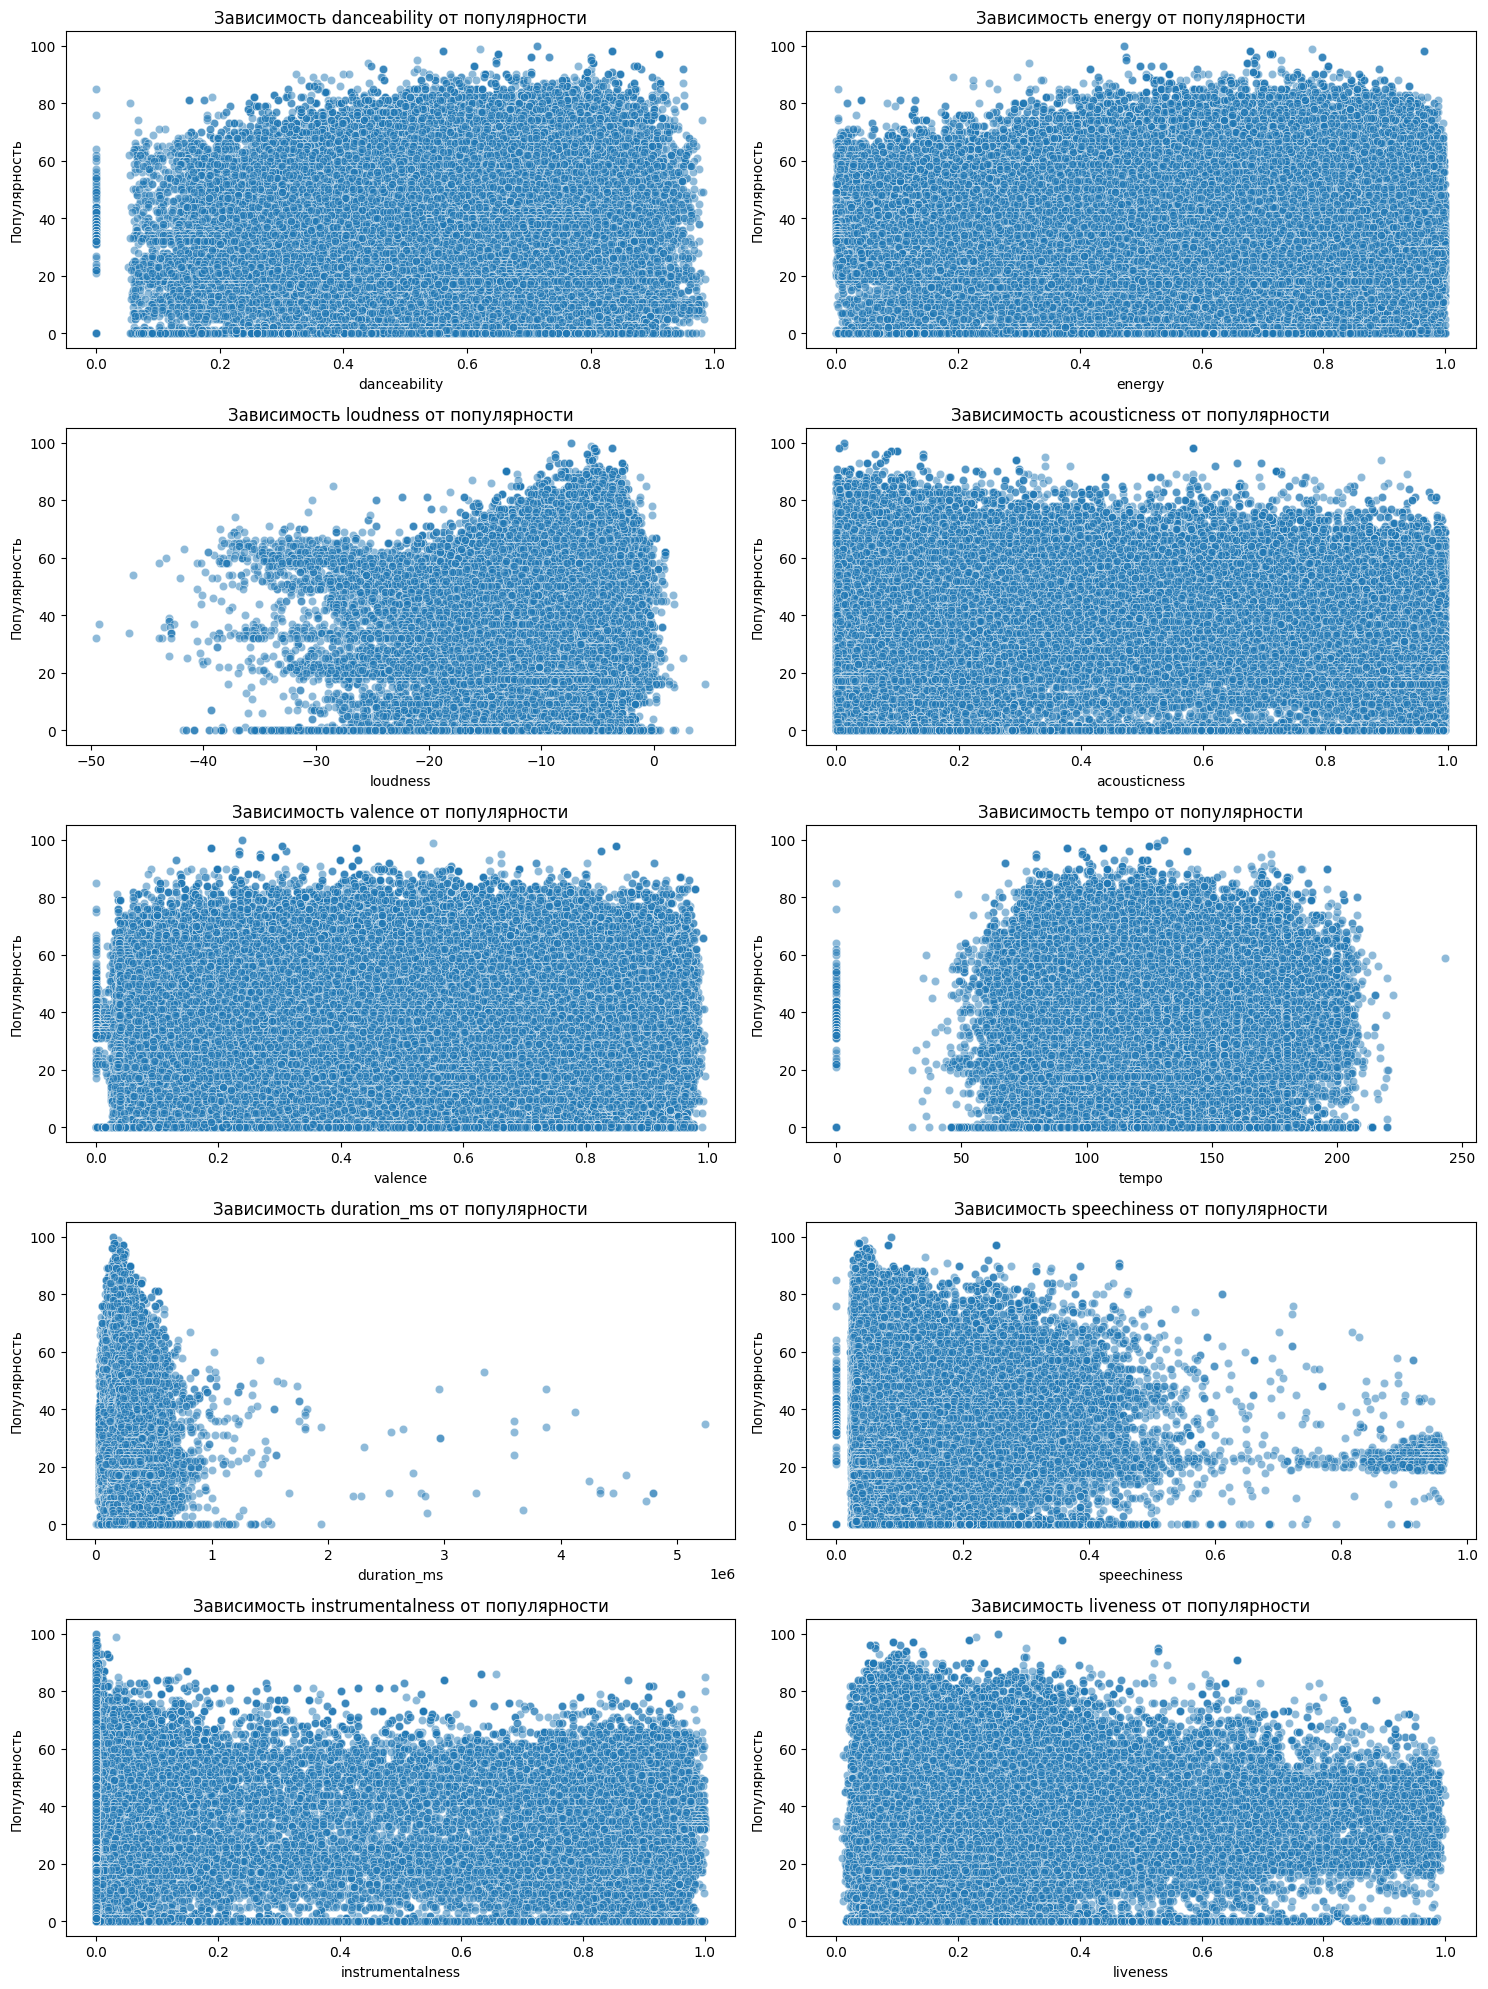

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что ваш датасет загружен в df
# df = pd.read_csv('your_dataset.csv')

# Убедимся, что 'popularity' является числовым значением
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Определим признаки, которые мы хотим исследовать
features = [
    'danceability', 'energy', 'loudness', 'acousticness',
    'valence', 'tempo', 'duration_ms', 'speechiness', 
    'instrumentalness', 'liveness'
]

# Построим графики зависимости для каждого признака
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)  # 5 строк, 2 колонки
    sns.scatterplot(data=data, x=feature, y='popularity', alpha=0.5)
    plt.title(f'Зависимость {feature} от популярности')
    plt.xlabel(feature)
    plt.ylabel('Популярность')

plt.tight_layout()
plt.show()


## Вывод

По данным графикам сложно ориентироваться, для большей наглядности разобьем числовые признаки на категории

## Разбитие числовых признаков на уровни

Танцевальность(danceability) и энергию (energy) можно разбить по 3 уровням: low, medium, high

/tmp/ipykernel_24/2765934479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['danceability_category'] = pd.qcut(df['danceability'], q=3, labels=["Low", "Medium", "High"])
/tmp/ipykernel_24/2765934479.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_category'] = pd.qcut(df['energy'], q=3, labels=["Low", "Medium", "High"])
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 

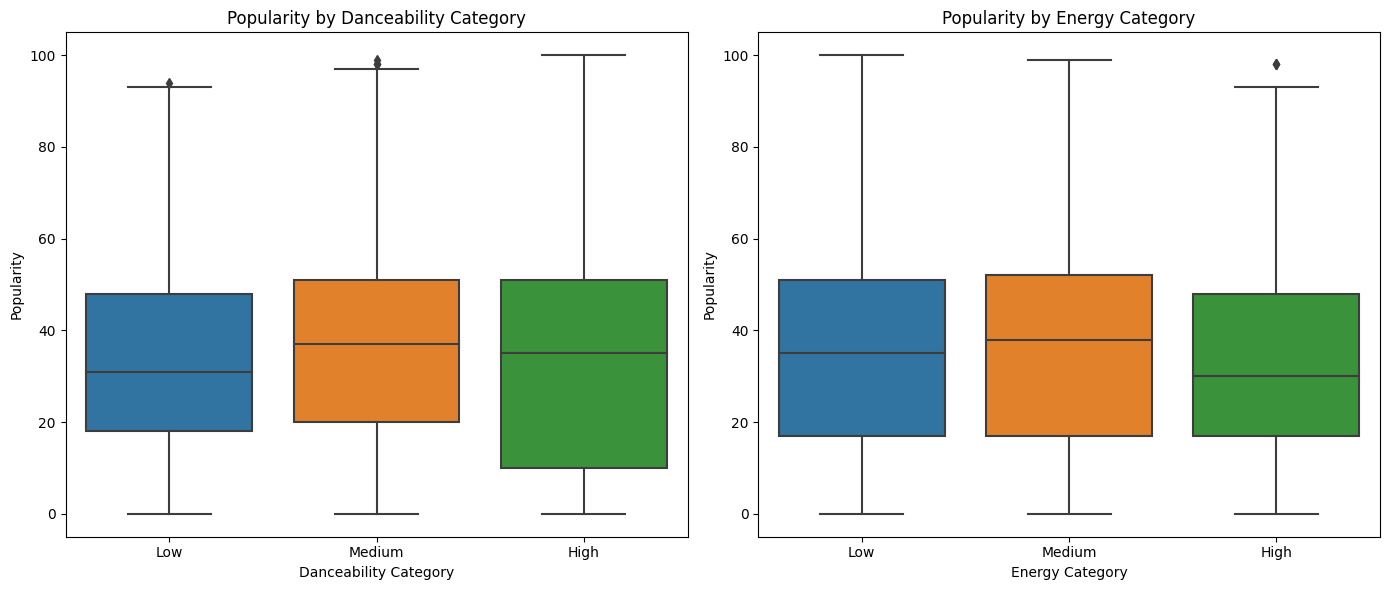

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data

# Разбиваем танцевальность и энергию на категории для создания более наглядных диаграмм
# Можно сделать категории более наглядными, округляя значения или создавая группы
df['danceability_category'] = pd.qcut(df['danceability'], q=3, labels=["Low", "Medium", "High"])
df['energy_category'] = pd.qcut(df['energy'], q=3, labels=["Low", "Medium", "High"])

# Размеры холста
plt.figure(figsize=(14, 6))

# Коробчатая диаграмма для танцевальности vs популярность
plt.subplot(1, 2, 1)
sns.boxplot(x='danceability_category', y='popularity', data=df)
plt.title("Popularity by Danceability Category")
plt.xlabel("Danceability Category")
plt.ylabel("Popularity")

# Коробчатая диаграмма для энергии vs популярность
plt.subplot(1, 2, 2)
sns.boxplot(x='energy_category', y='popularity', data=df)
plt.title("Popularity by Energy Category")
plt.xlabel("Energy Category")
plt.ylabel("Popularity")

# Отображение графиков
plt.tight_layout()
plt.show()

## Компоненты box plot
Ящик (Box):

Представляет собой диапазон между первым квартилем (Q1, или 25-й процентиль) и третьим квартилем (Q3, или 75-й процентиль).
Средняя линия внутри ящика показывает медиану (Q2, или 50-й процентиль), это центральное значение, которое делит данные пополам.
Длина ящика (иногда называют межквартильным диапазоном, IQR) показывает, насколько разбросаны данные.
"Усы" (Whiskers):

"Усы" исходят из ящика и показывают минимальное и максимальное значение данных, которое не является выбросом.
Обычно усы простираются на 1.5 IQR от первого и третьего квартилей.
Выбросы (Outliers):

Данные, которые находятся за пределами 1.5 IQR от ящика, считаются выбросами и отображаются как отдельные точки.
Выбросы могут указывать на уникальные, необычные значения.

## Больше категориальных признаков с boxplot

/tmp/ipykernel_24/2432569405.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_category'] = pd.qcut(df[column], q=3, labels=["Low", "Medium", "High"], duplicates="drop")
/tmp/ipykernel_24/2432569405.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_category'] = pd.qcut(df[column], q=3, labels=["Low", "Medium", "High"], duplicates="drop")
/tmp/ipykernel_24/2432569405.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

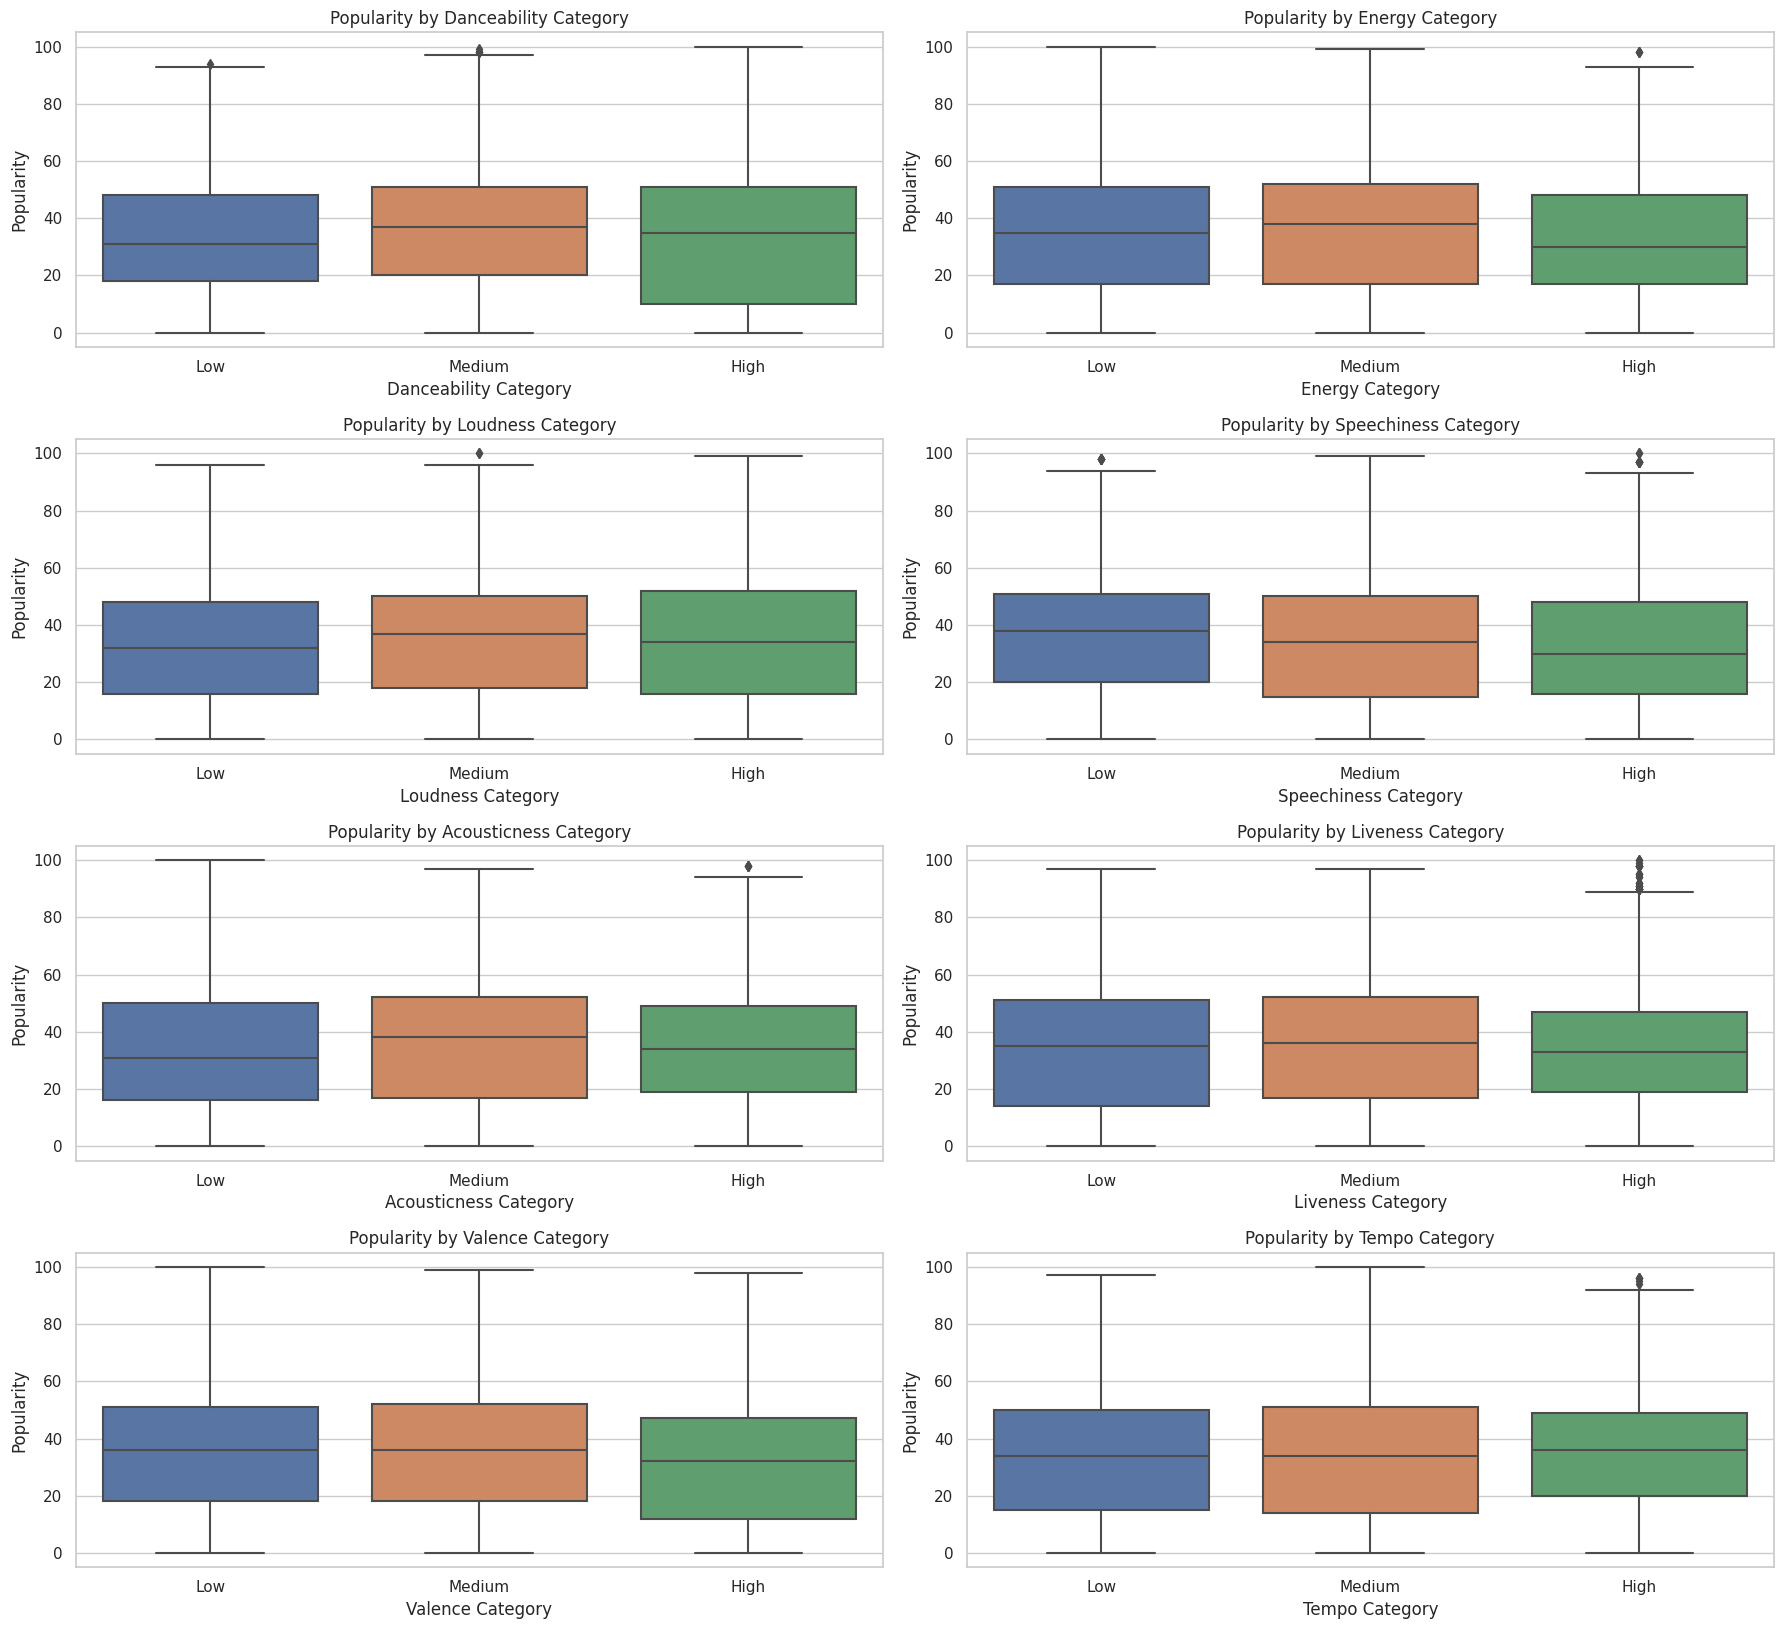

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных (замените 'your_dataset.csv' на фактический путь к файлу)
df = data

# Определение числовых признаков (исключая "popularity", так как это целевой признак)
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

# Создание категорий на основе квартилей для каждого признака
for column in numeric_columns:
    try:
        df[f'{column}_category'] = pd.qcut(df[column], q=3, labels=["Low", "Medium", "High"], duplicates="drop")
    except ValueError as e:
        print(f"Cannot create categories for {column}: {e}")

# Устанавливаем стиль для графиков
sns.set(style="whitegrid")

# Размер холста для множества графиков
plt.figure(figsize=(18, 20))

# Построение box plots для каждого числового признака
for i, column in enumerate(numeric_columns, 1):
    if f'{column}_category' in df.columns:
        plt.subplot(5, 2, i)
        sns.boxplot(x=f'{column}_category', y='popularity', data=df)
        plt.title(f"Popularity by {column.capitalize()} Category")
        plt.xlabel(f"{column.capitalize()} Category")
        plt.ylabel("Popularity")

# Отображение всех графиков
plt.tight_layout()
plt.show()

## Интерпретация box plot

Центральная тенденция: Медиана внутри ящика показывает центральное значение, а расположение ящика относительно оси даёт представление о том, где сосредоточена большая часть данных.

Разброс данных: Длина ящика и усы показывают разброс данных и уровень вариативности.

Чем длиннее ящик и усы, тем более разбросаны данные.

Узкий ящик и короткие усы указывают на более сжатые данные.

Симметрия и скошенность:

-Если медиана находится посередине ящика и усы равны, данные симметричны.

-Если медиана смещена, а один из усов длиннее, это указывает на скошенность в данных.

Выбросы: Точки за пределами "усов" могут быть важными, они показывают аномальные значения, которые сильно отличаются от основной группы.

## Выводы по графикам
1) Если оценивать по медиане то:

    danceability: средний уровень наиболее популярен 
    
    energy: средний уровень наиболее популярен 
    
    loudness: средний уровень наиболее популярен 
    
    speechiness: низкий  уровень наиболее популярен
    
    acousticness: средний уровень наиболее популярен
    
    liveness: средний уровень наиболее популярен
    
    valence: средний уровень наиболее популярен
    
    tempo: высокий уровень наиболлее популярен
    
Вывод: трек будет наиболее популяерен, если будет иметь средний уровень по признакам danceability, energy, loudness, acousticness, liveness, valence, а по tempo высокий, по speechiness низкий.

2) Если оценивать по количеству 
    danceability: высокий уровень наиболее распространен 

    energy: средний уровень наиболее распространен
    
    loudness: высокий уровень наиболее распространен 
    
    speechiness: средний уровень наиболее распространен
    
    acousticness: средний уровень наиболее распространен
    
    liveness: низкий уровень наиболее распространен
    
    valence: уровени +- одинакова распространены 
    
    tempo: средний уровень наиболлее распространен

Вывод: по большей части распространены средние уровни по данным категориям.

3) liveness имеет много выбросов, по сравнению с другими
   




## Общий вывод
Можно попробывать добавить признаки по уровням для датасета

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             113999 non-null  int64   
 1   track_id               113999 non-null  object  
 2   artists                113999 non-null  object  
 3   album_name             113999 non-null  object  
 4   track_name             113999 non-null  object  
 5   popularity             113999 non-null  int64   
 6   duration_ms            113999 non-null  int64   
 7   explicit               113999 non-null  bool    
 8   danceability           113999 non-null  float64 
 9   energy                 113999 non-null  float64 
 10  key                    113999 non-null  int64   
 11  loudness               113999 non-null  float64 
 12  mode                   113999 non-null  int64   
 13  speechiness            113999 non-null  float64 
 14  acousticness           11

In [12]:
data['energy_category']

0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
113995    Low
113996    Low
113997    Low
113998    Low
113999    Low
Name: energy_category, Length: 113999, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [13]:
data.groupby('explicit').popularity.value_counts()

explicit  popularity
False     0             14714
          44             2118
          22             2113
          21             2102
          43             1927
                        ...  
True      97                4
          93                3
          98                3
          92                2
          96                2
Name: count, Length: 199, dtype: int64

In [14]:
#track_genre
data.groupby('track_genre').popularity.value_counts()

track_genre  popularity
acoustic     0             56
             26            50
             51            46
             27            45
             28            43
                           ..
world-music  3              1
             11             1
             13             1
             67             1
             70             1
Name: count, Length: 6426, dtype: int64

## Популярность по жанрам и по explicet

/tmp/ipykernel_24/2473706380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')


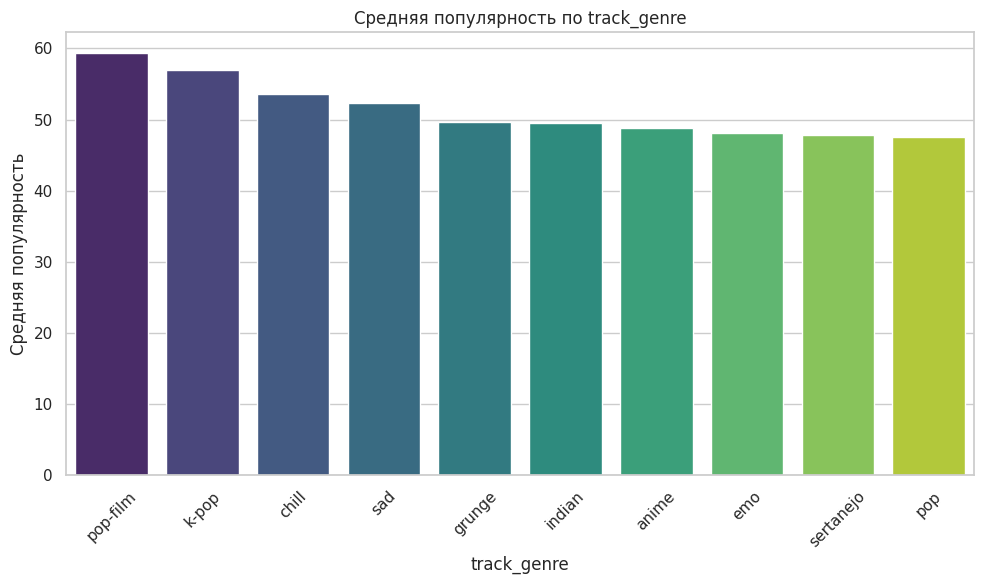

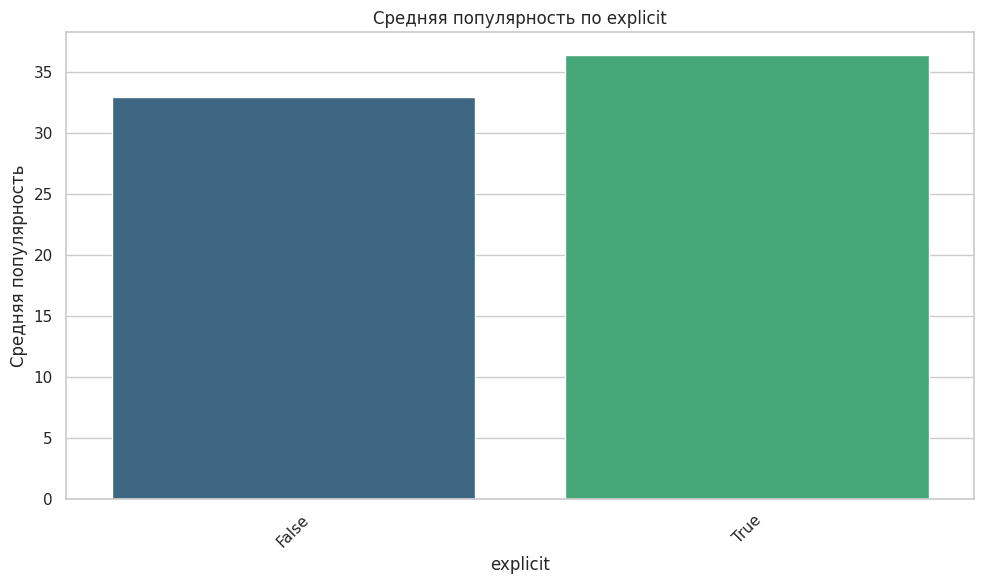

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что ваш датасет загружен в df
df = data
# Убедимся, что 'popularity' является числовым значением
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# Функция для построения графиков зависимостей
def plot_categorical_vs_popularity(data, category, top_n=10):
    plt.figure(figsize=(10, 6))
    
    # Находим среднюю популярность для каждого значения категориального признака
    popularity_by_category = data.groupby(category)['popularity'].mean().reset_index()
    
    # Сортируем по популярности и выбираем top_n
    top_categories = popularity_by_category.sort_values(by='popularity', ascending=False).head(top_n)
    
    # Столбчатая диаграмма
    sns.barplot(data=top_categories, x=category, y='popularity', palette='viridis')
    plt.title(f'Средняя популярность по {category}')
    plt.xlabel(category)
    plt.ylabel('Средняя популярность')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_categorical_vs_popularity(df, 'track_genre', top_n=10)
plot_categorical_vs_popularity(df, 'explicit')


## Вывод по жанрам
Наиболее популярные жанры: pop-film, k-pop, chill, sad, grundge, индийская музыка, аниме и многие другие.

Можно было бы попробовать сопоставить имена артистов с жанрами. Например, k-pop-исполнители обычно корейские, аниме — японские, а индийские музыканты — из Индии. Однако не совсем понятно, зачем это нужо.

## Вывод по explicet
Треки с нецензурными выражениями в среднем более популярные

In [16]:
import pandas as pd

# Предположим, что ваш датасет загружен в df
# df = pd.read_csv('your_dataset.csv')

# Создание нового признака: длина названия трека
df['track_name_length'] = df['track_name'].str.len()

# Проверка добавленного столбца
print(df[['track_name', 'track_name_length']].head())


                   track_name  track_name_length
0                      Comedy                  6
1            Ghost - Acoustic                 16
2              To Begin Again                 14
3  Can't Help Falling In Love                 26
4                     Hold On                  7


/tmp/ipykernel_24/2350687394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_name_length'] = df['track_name'].str.len()


## Cвязь популярности с длиной названия трека

/tmp/ipykernel_24/404992655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_name_length'] = df['track_name'].str.len()


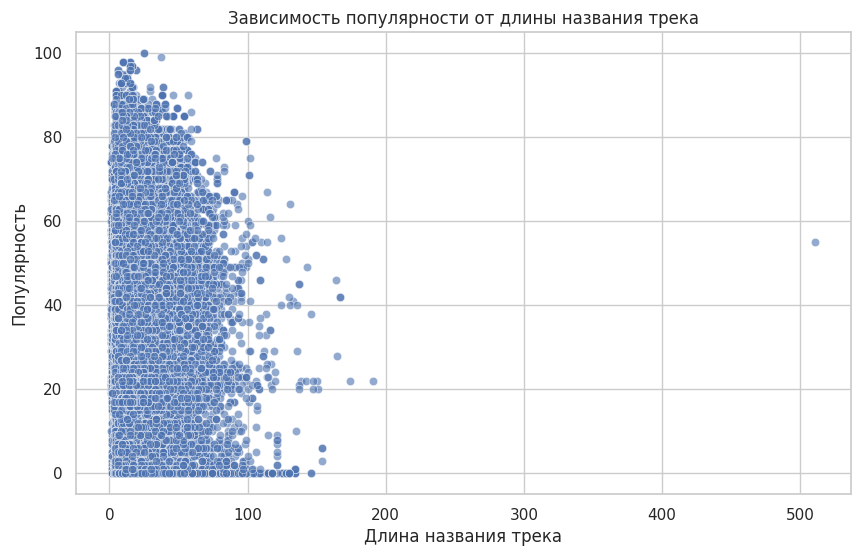

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем новый признак: длина названия трека
df['track_name_length'] = df['track_name'].str.len()

# Строим график зависимости популярности от длины названия трека
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='track_name_length', y='popularity', alpha=0.6)

# Добавляем titles и labels
plt.title('Зависимость популярности от длины названия трека')
plt.xlabel('Длина названия трека')
plt.ylabel('Популярность')
plt.grid(True)

# Отображаем график
plt.show()

Создали новый признак по длине названия трека

## Вывод
Из графика видно, что чем популярнее трек, тем короче его название

# 2. Корелляция

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             113999 non-null  int64   
 1   track_id               113999 non-null  object  
 2   artists                113999 non-null  object  
 3   album_name             113999 non-null  object  
 4   track_name             113999 non-null  object  
 5   popularity             113999 non-null  int64   
 6   duration_ms            113999 non-null  int64   
 7   explicit               113999 non-null  bool    
 8   danceability           113999 non-null  float64 
 9   energy                 113999 non-null  float64 
 10  key                    113999 non-null  int64   
 11  loudness               113999 non-null  float64 
 12  mode                   113999 non-null  int64   
 13  speechiness            113999 non-null  float64 
 14  acousticness           11

In [19]:
level_category = data.select_dtypes(include=['category']).columns.tolist()
label_encoders = {}

In [20]:
from sklearn.preprocessing import LabelEncoder
for col in level_category:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

/tmp/ipykernel_24/1695561802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipykernel_24/1695561802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipykernel_24/1695561802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [21]:
category = data.select_dtypes(include=['object']).columns.tolist()
encoders = {}

In [22]:
category

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in category:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

/tmp/ipykernel_24/653127310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipykernel_24/653127310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipykernel_24/653127310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             113999 non-null  int64  
 1   track_id               113999 non-null  int64  
 2   artists                113999 non-null  int64  
 3   album_name             113999 non-null  int64  
 4   track_name             113999 non-null  int64  
 5   popularity             113999 non-null  int64  
 6   duration_ms            113999 non-null  int64  
 7   explicit               113999 non-null  bool   
 8   danceability           113999 non-null  float64
 9   energy                 113999 non-null  float64
 10  key                    113999 non-null  int64  
 11  loudness               113999 non-null  float64
 12  mode                   113999 non-null  int64  
 13  speechiness            113999 non-null  float64
 14  acousticness           113999 non-null  f

Уберем лишние колонки 'Unnamed: 0', "track_id"

In [25]:
data = data.drop(columns=['Unnamed: 0', "track_id"],  errors='ignore')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   artists                113999 non-null  int64  
 1   album_name             113999 non-null  int64  
 2   track_name             113999 non-null  int64  
 3   popularity             113999 non-null  int64  
 4   duration_ms            113999 non-null  int64  
 5   explicit               113999 non-null  bool   
 6   danceability           113999 non-null  float64
 7   energy                 113999 non-null  float64
 8   key                    113999 non-null  int64  
 9   loudness               113999 non-null  float64
 10  mode                   113999 non-null  int64  
 11  speechiness            113999 non-null  float64
 12  acousticness           113999 non-null  float64
 13  instrumentalness       113999 non-null  float64
 14  liveness               113999 non-null  f

### Матрица корреляции численных признаков

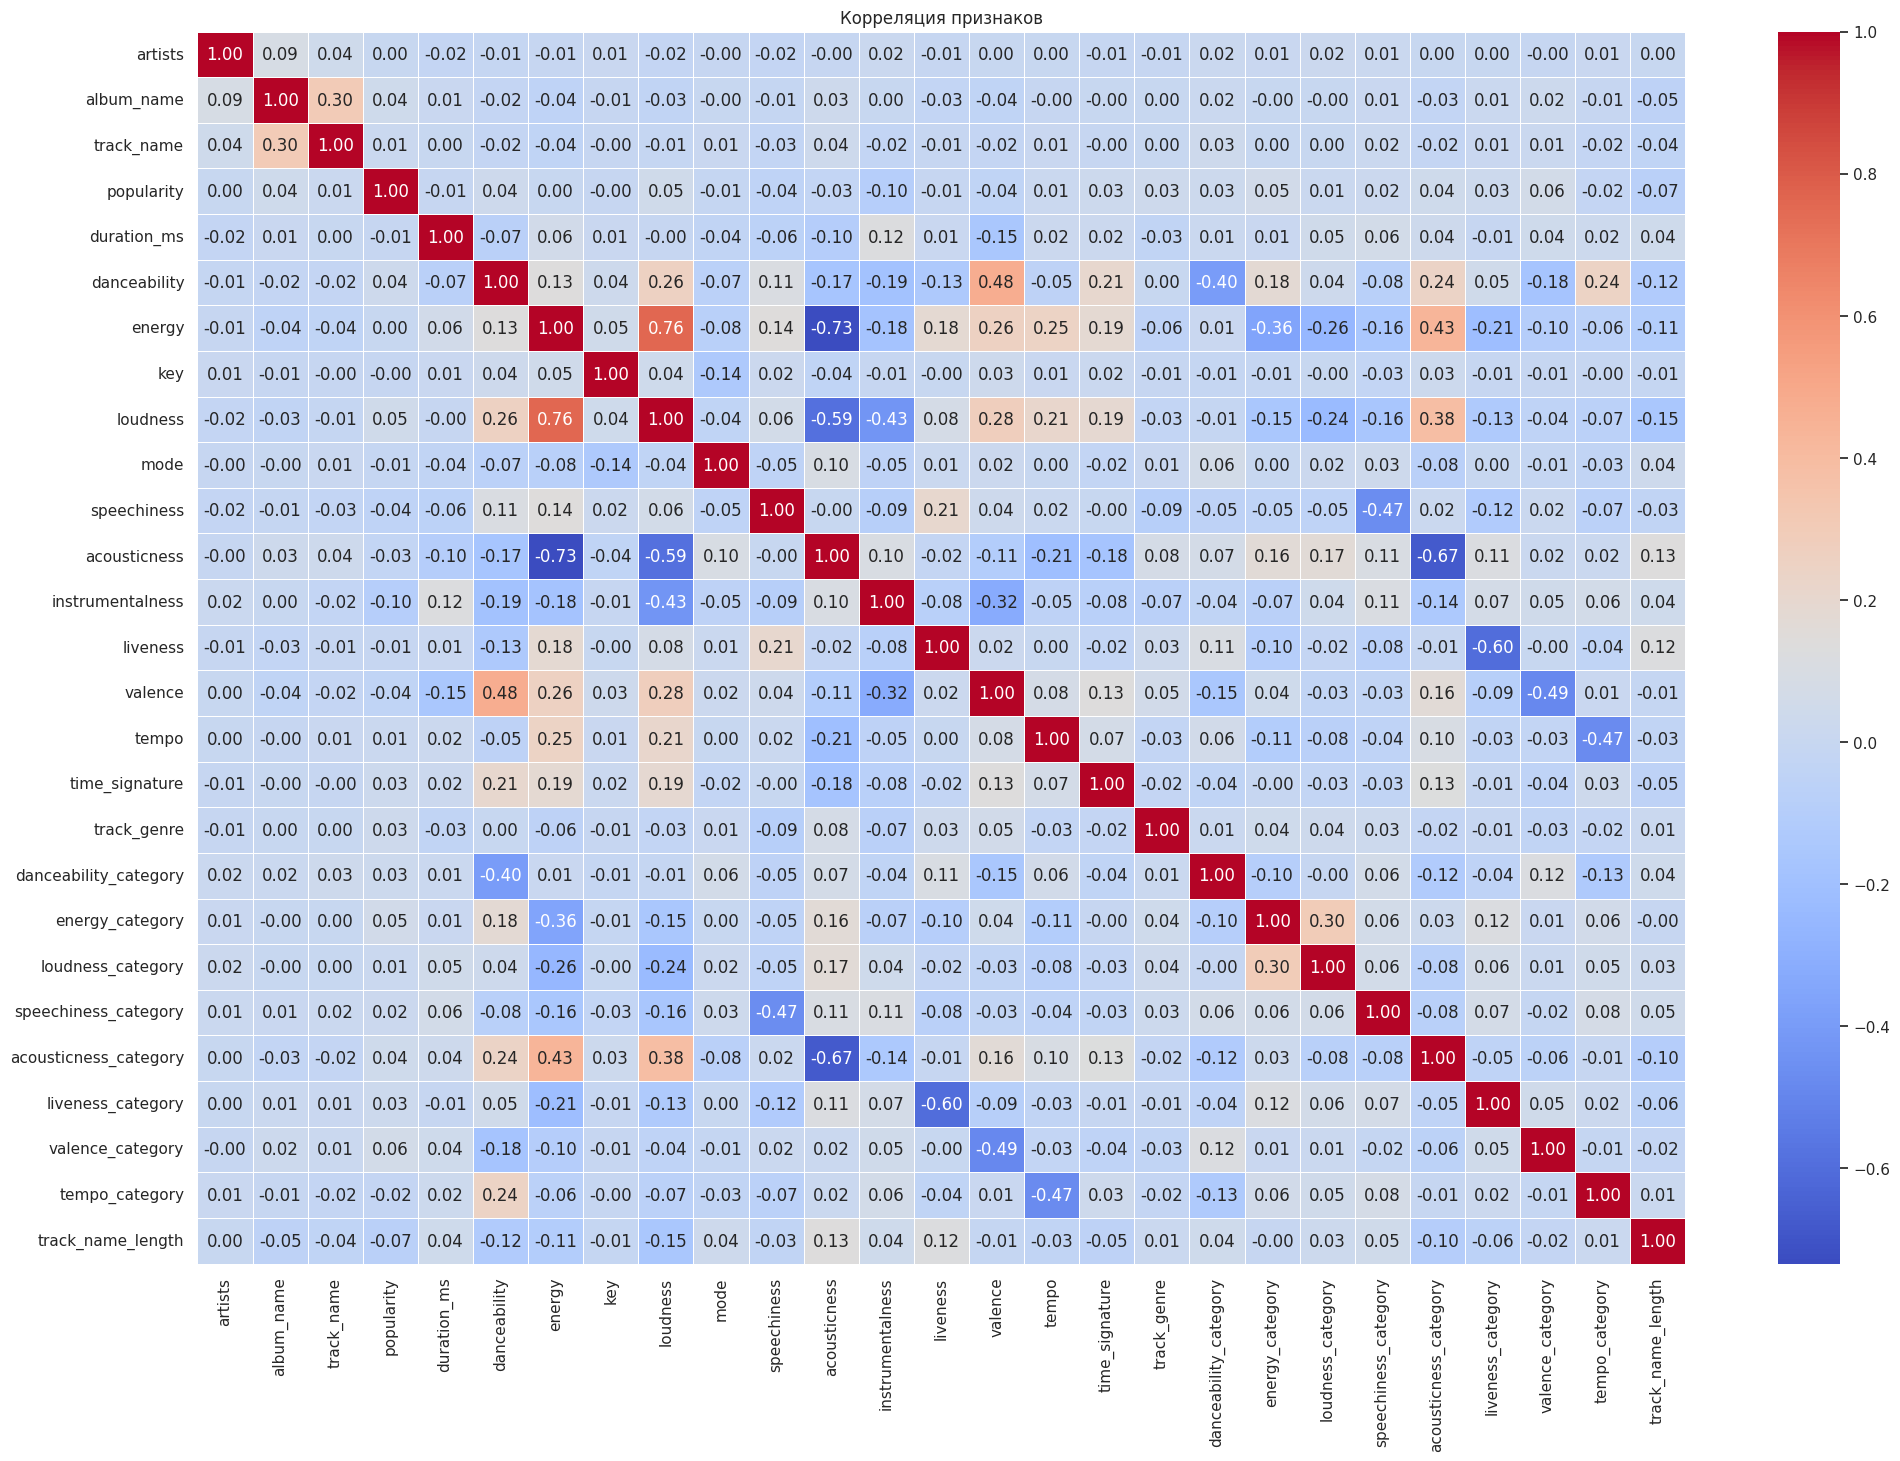

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Матрица корреляции признаков
# Исключим категориальные признаки, поскольку корреляция применяется к числовым данным
df_numeric = data.select_dtypes(include=['float64', 'int64'])

# Рассчитываем корреляцию между признаками
correlation_matrix = df_numeric.corr()

# Визуализируем матрицу корреляции
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция признаков')
plt.show()


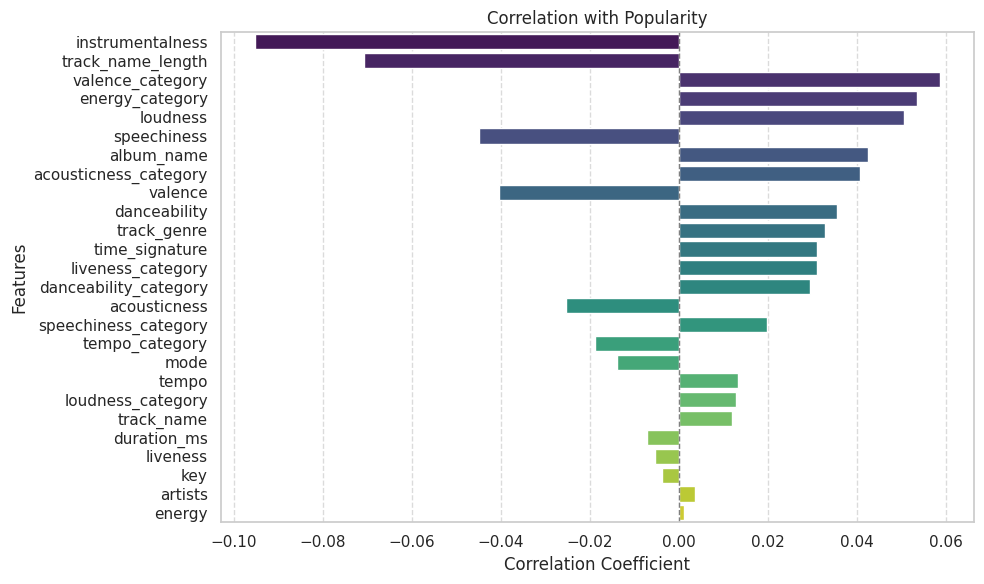

In [29]:
# 2. Корреляция с целевой переменной 'popularity'
# Корреляция с популярностью
popularity_corr = correlation_matrix['popularity'].drop('popularity').sort_values(key=abs, ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_corr.values, y=popularity_corr.index, palette='viridis')
plt.title('Correlation with Popularity')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-Признаки с положительной корреляцией (приближаются к +1) увеличивают популярность.

-Признаки с отрицательной корреляцией (приближаются к -1) уменьшают популярность.

-Признаки с низкой корреляцией (близкой к 0) мало влияют на популярность.

## Вывод по корреляции
Видим, что все признаки слабо коррелируют с таргетом.
Почти 0 корелляция у duration_ms,liveness, key, energy, но удалять колонки будем уже после рассмотрения важности признаков

# 3. Построение моделей

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   artists                113999 non-null  int64  
 1   album_name             113999 non-null  int64  
 2   track_name             113999 non-null  int64  
 3   popularity             113999 non-null  int64  
 4   duration_ms            113999 non-null  int64  
 5   explicit               113999 non-null  bool   
 6   danceability           113999 non-null  float64
 7   energy                 113999 non-null  float64
 8   key                    113999 non-null  int64  
 9   loudness               113999 non-null  float64
 10  mode                   113999 non-null  int64  
 11  speechiness            113999 non-null  float64
 12  acousticness           113999 non-null  float64
 13  instrumentalness       113999 non-null  float64
 14  liveness               113999 non-null  f

In [33]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = data['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
import tensorflow as tf
from tensorflow import keras

## Простая нейронная модель

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 600.5496 - val_loss: 473.1779
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 462.7369 - val_loss: 462.1836
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 454.1540 - val_loss: 454.7248
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 446.3420 - val_loss: 450.1807
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 437.9928 - val_loss: 445.9308
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 432.0553 - val_loss: 441.1373
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 426.6226 - val_loss: 438.5929
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 422.2641 - val_loss: 435.3150
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 414.6582 - val_loss: 434.6930
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 413.2678 - val_loss: 430.4224
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 432.7439
Test Loss: 425.8931884765625


In [47]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step
MAE: 16.330361971604198
RMSE: 20.16238556127959


In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

1.7674319596429904e+16

## Важность признаков

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step
713/713 ━━━

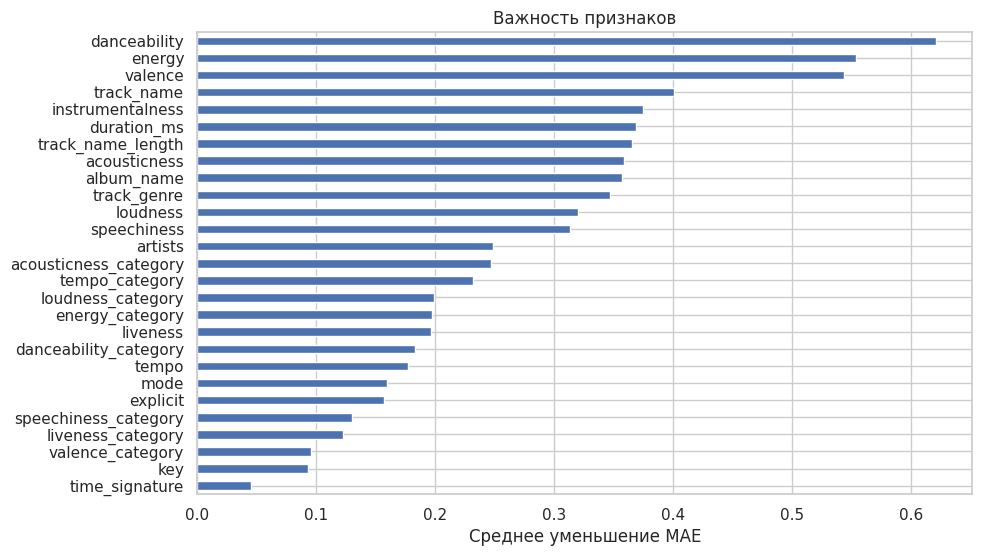

In [38]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Убираем неважные признаки

In [40]:
data = data.drop(columns=['key', 'time_signature', 'valence_category', 'liveness_category', 'speechiness_category'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   artists                113999 non-null  int64  
 1   album_name             113999 non-null  int64  
 2   track_name             113999 non-null  int64  
 3   popularity             113999 non-null  int64  
 4   duration_ms            113999 non-null  int64  
 5   explicit               113999 non-null  bool   
 6   danceability           113999 non-null  float64
 7   energy                 113999 non-null  float64
 8   loudness               113999 non-null  float64
 9   mode                   113999 non-null  int64  
 10  speechiness            113999 non-null  float64
 11  acousticness           113999 non-null  float64
 12  instrumentalness       113999 non-null  float64
 13  liveness               113999 non-null  float64
 14  valence                113999 non-null  f

## Построим новую модель

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model_new = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),  # Drop 20% of neurons
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 429.0690 - val_loss: 427.1774
Epoch 2/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 427.5804 - val_loss: 424.0565
Epoch 3/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 424.7555 - val_loss: 425.1137
Epoch 4/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 423.7016 - val_loss: 422.6626
Epoch 5/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 418.9006 - val_loss: 422.8744
Epoch 6/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 422.3443 - val_loss: 423.8757
Epoch 7/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 421.8227 - val_loss: 424.5844
Epoch 8/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 419.2535 - val_loss: 422.3023
Epoch 9/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 418.5727 - val_loss: 421.4920
Epoch 10/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 420.3466 - val_loss: 420.3976
Epoch 11/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 420.1873 - val_loss: 424.18

In [46]:
# Прогнозирование на тестовой выборке
y_pred = model_new.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
#MAE: 16.746118341092217
#RMSE: 20.637178012383462

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step
MAE: 33.771914199556534
RMSE: 40.4510786011762


По метрикам видим, что модель переобучилась

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

1.7765551821382212e+16

## Настройка гиперпараметров

Используем поиск по сетке (GridSearch) для настройки гиперпараметров:
Количество нейронов
Количество слоев
Batch size
Learning rate

optuna
grid search

In [49]:
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(hp.Int('units', min_value=32, max_value=256, step=32),
                                 activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=10, directory='tuner_dir', project_name='regression')
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 00m 48s]
val_loss: 393.84014892578125

Best val_loss So Far: 393.84014892578125
Total elapsed time: 00h 07m 55s


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

# Объявляем раннюю остановку
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Использование лучших гиперпараметров
best_model = tuner.hypermodel.build(best_hps)

# Финальное обучение
best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Оценка
loss = best_model.evaluate(X_test, y_test)
print(f"Final Loss: {loss}")

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 510.5261 - val_loss: 469.0616
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 456.8423 - val_loss: 449.0291
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 433.8297 - val_loss: 437.5179
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 424.0114 - val_loss: 426.9556
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 412.8876 - val_loss: 413.0457
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 402.9670 - val_loss: 421.0492
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 393.8152 - val_loss: 419.0862
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 388.1513 - val_loss: 410.5832
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 374.4714 - val_loss: 406.9168
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 369.1773 - val_loss: 393.7311
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 362.2

**Mean Squared Error (MSE)** – среднее значение квадрата разности между предсказанными и правильными значениями.

**Root Mean Squared Error (RMSE)** – квадратный корень из среднего значения квадратов разности между предсказанными и правильными значениями.

**Mean Absolute Error (MAE)** – среднее значение абсолютной разности между предсказанными и правильными значениями.

**R2-коэффициент детерминации** – мера, которая показывает, насколько хорошо модель подходит для данных. R2-коэффициент может принимать значения от 0 до 1, где 1 означает идеальное соответствие.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Прогнозирование на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"Test R²: {test_r2:.3f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 15.216941881807227
RMSE: 19.36256920636815
Test R²: 0.244


За счет early_stopping и подбора гиперпараметров улучшили метрики

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказания
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Метрики на обучении
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)
    
    # Метрики на тестировании
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"Train MAE: {train_mae:.3f}, Train RMSE: {train_rmse:.3f}, Train R²: {train_r2:.3f}")
    print(f"Test MAE: {test_mae:.3f}, Test RMSE: {test_rmse:.3f}, Test R²: {test_r2:.3f}")

Написал функцию для тестирования моделей

## Линейная модель
Попробуем линейную модель с использованием Ridge (линейная регрессия с регуляризацией)

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Линейная модель
ridge = Ridge(alpha=1.0)  # Параметр регуляризации
evaluate_model(ridge, X_train, y_train, X_test, y_test)

Train MAE: 18.207, Train RMSE: 21.911, Train R²: 0.036
Test MAE: 18.212, Test RMSE: 21.899, Test R²: 0.033


## Деревья решений

Пример с использованием DecisionTreeRegressor:

In [55]:
from sklearn.tree import DecisionTreeRegressor

# Дерево решений
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
evaluate_model(tree, X_train, y_train, X_test, y_test)

Train MAE: 15.323, Train RMSE: 19.579, Train R²: 0.230
Test MAE: 15.926, Test RMSE: 20.258, Test R²: 0.173


In [56]:
from sklearn.tree import DecisionTreeRegressor

# Дерево решений
tree = DecisionTreeRegressor(max_depth=20, random_state=42)
evaluate_model(tree, X_train, y_train, X_test, y_test)

Train MAE: 5.820, Train RMSE: 10.720, Train R²: 0.769
Test MAE: 13.314, Test RMSE: 19.792, Test R²: 0.210


In [57]:
from sklearn.tree import DecisionTreeRegressor

# Дерево решений
tree = DecisionTreeRegressor(max_depth=20, random_state=30)
evaluate_model(tree, X_train, y_train, X_test, y_test)

Train MAE: 5.819, Train RMSE: 10.720, Train R²: 0.769
Test MAE: 13.361, Test RMSE: 19.892, Test R²: 0.202


## Градиентный бустинг
Пример с использованием XGBoost:

In [58]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 12.725, Train RMSE: 16.580, Train R²: 0.448
Test MAE: 13.154, Test RMSE: 17.121, Test R²: 0.409


In [59]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 8.082, Train RMSE: 11.128, Train R²: 0.751
Test MAE: 10.669, Test RMSE: 14.381, Test R²: 0.583


In [60]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.2, random_state=40)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 5.702, Train RMSE: 8.015, Train R²: 0.871
Test MAE: 9.788, Test RMSE: 13.332, Test R²: 0.642


In [61]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.3, random_state=40)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 4.580, Train RMSE: 6.541, Train R²: 0.914
Test MAE: 9.695, Test RMSE: 13.264, Test R²: 0.645


In [62]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.3, random_state=40)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 2.265, Train RMSE: 3.397, Train R²: 0.977
Test MAE: 9.084, Test RMSE: 12.704, Test R²: 0.675


In [63]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.3, random_state=40)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 1.260, Train RMSE: 2.034, Train R²: 0.992
Test MAE: 8.852, Test RMSE: 12.540, Test R²: 0.683


In [64]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=300, max_depth=20, learning_rate=0.3, random_state=40)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 0.054, Train RMSE: 0.882, Train R²: 0.998
Test MAE: 9.620, Test RMSE: 14.026, Test R²: 0.603


Дальшейшее увеличение глубины ведет к переобучению

In [65]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.4, random_state=40)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 0.803, Train RMSE: 1.459, Train R²: 0.996
Test MAE: 9.166, Test RMSE: 13.034, Test R²: 0.658


Дальнейшее увеличения learning_rate ведет к переобучению

In [68]:
xgb = XGBRegressor(n_estimators=400, max_depth=10, learning_rate=0.3, random_state=40)
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Train MAE: 0.748, Train RMSE: 1.392, Train R²: 0.996
Test MAE: 8.741, Test RMSE: 12.475, Test R²: 0.686


Увеличения количества деревьев привело к лучшему результату

Градиентный бустинг показал лучшие результаты по всем метрикам

In [57]:
best_xgb_model = XGBRegressor(n_estimators=400, max_depth=10, learning_rate=0.3, random_state=40)
final_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Лучшая модель - Средний MSE (10 фолдов):", -final_scores.mean())

Лучшая модель - Средний MSE (10 фолдов): 170.58639609856556


In [69]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

# Создание модели
best_xgb_model = XGBRegressor(n_estimators=400, max_depth=10, learning_rate=0.3, random_state=40)

# Кросс-валидация для MSE
mse_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Лучшая модель - Средний MSE (10 фолдов):", -mse_scores.mean())

# Кросс-валидация для MAE
mae_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print("Лучшая модель - Средний MAE (10 фолдов):", -mae_scores.mean())

# Кросс-валидация для R²
r2_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring='r2')
print("Лучшая модель - Средний R² (10 фолдов):", r2_scores.mean())


Лучшая модель - Средний MSE (10 фолдов): 168.8884978248333
Лучшая модель - Средний MAE (10 фолдов): 9.115073599918777
Лучшая модель - Средний R² (10 фолдов): 0.6607062687174048


# 4. Итоговый вывод по проделанной работе

#### 1. **Постановка задачи**:
Целью исследования было провести эксперименты с различными семействами моделей машинного и глубокого обучения, чтобы найти лучшую модель для предсказания целевой переменной. Была выполнена следующая последовательность шагов:

- **Подготовка данных**: 
  - Проведен анализ графиков
  - Добавлены признаки для характеристики уровней численных признаков, а также добавлен признак длины названия трека
  - Выполнено кодирование категориальных признаков.
  - Проанализирована корреляция признаков между собой и с таргетом
  - Данные были разделены на тренировочную и тестовую выборки.
  - Проведен анализ важности признаков с помощью permutation importance и удалены лишние колонки.

#### 2. **Эксперименты с моделями**:
Были протестированы следующие модели:
- **Линейная модель**: Ridge Regression
  - Простая и интерпретируемая модель.
  - Быстрое время обучения, но низкая точность

- **Дерево решений**: Decision Tree Regressor
  - Умеренная производительность.
  - Склонность к переобучению при отсутствии ограничения глубины.

- **Градиентный бустинг**: XGBoost
  - Высокая точность и стабильность.
  - Оптимальное соотношение скорости обучения и качества предсказаний.

- **Глубокая нейронная сеть**:
  - Параметры оптимизированы с помощью `KerasTuner`.
  - Высокая гибкость модели, но сложность архитектуры делает ее менее эффективной на данном наборе данных.

#### 3. **Сравнение моделей**:
Каждая модель была протестирована по метрикам **RMSE**, **MAE** и **R²**. Итоги:

| Модель              |     RMSE     |      MAE    |       R²    |
|---------------------|--------------|-------------|-------------|
| Ridge Regression    |    21.899    |    18.212   |     0.033   |
| Decision Tree       |    19.792    |    13.314   |     0.210   |
| XGBoost             |    8.741     |    12.475   |     0.686   |
| Нейронная сеть      |    19.363    |    15.217   |     0.244   |

#### 4. **Лучшая модель**:
- **Градиентный бустинг (XGBoost)** показал наилучший результат по ключевым метрикам. Результаы кросс-валидации с 10 фолдами:
  - Средний MSE: 168.888
  - MAE: 9.115
  - R²: 0.661

- Модель обладает высокой точностью и стабильностью, что делает ее оптимальным выбором для данной задачи.

#### 5. **Выводы и рекомендации**:
- Градиентный бустинг показал себя как наиболее эффективное решение благодаря своей способности выявлять сложные нелинейные зависимости в данных.
- Нейронная сеть оказалась избыточной для данной задачи из-за относительно небольшого размера данных.
- Линейная модель и дерево решений подойдут для быстрого прототипирования, но не для высокоточных предсказаний.

**Итог**: Градиентный бустинг рекомендован как финальная модель для задачи.